In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from imageio import imread
from skimage import data
from PIL import Image

%matplotlib inline 

In [21]:
cie_img = skimage.color.convert_colorspace(face, 'RGB', 'RGB CIE')


In [3]:
test = np.empty((900, 600, 3))
for i in range(900) :
    for j in range(600) :
        test[i][j] = [0, 0, 1]


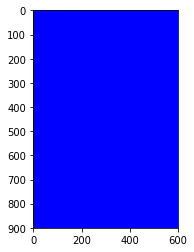

In [4]:
plt.imshow(test)

In [63]:
cie_img = skimage.color.convert_colorspace(test, 'RGB', 'RGB CIE')
cie_img[0][0]

array([-0.01466154,  0.01669446,  0.16969164])

In [64]:
xyz_img = skimage.color.convert_colorspace(test, 'RGB', 'XYZ')
xyz_img[0][0]

array([0.180423, 0.072169, 0.950227])

In [22]:
# For now, assumes dimensions of img are divisible by newDim for convenience
def split(img, newDim) :
    result = np.empty((newDim, newDim, 3))
    horizBlockSize = img.shape[0] / newDim
    vertBlockSize = img.shape[1] / newDim
    for i in range(newDim) :
        for j in range(newDim) :
            startHorizIdx = int(i * horizBlockSize)
            endHorizIdx = int((i + 1) * horizBlockSize)
            startVertIdx = int(j * vertBlockSize)
            endVertIdx = int((j + 1) * vertBlockSize)
            result[i][j] = img[startHorizIdx:endHorizIdx][startVertIdx:endVertIdx]
    return result

In [23]:
# Returns a matrix of dimensions newDim x newDim called result, where result[i][j][k] corresponds to 
# the color score for color k of the (i, j)th subsection, where (0, 0) is the top left.
def computeAllColorScores(img, splitDim) :
    result = np.zeros((splitDim, splitDim, len(color_fs)))
    horizBlockSize = img.shape[0] / splitDim
    vertBlockSize = img.shape[1] / splitDim
    for i in range(splitDim) :
        for j in range(splitDim) :
            startHorizIdx = int(i * horizBlockSize)
            endHorizIdx = int((i + 1) * horizBlockSize)
            startVertIdx = int(j * vertBlockSize)
            endVertIdx = int((j + 1) * vertBlockSize)
            for x in range(startHorizIdx, endHorizIdx) :
                for y in range(startVertIdx, endVertIdx) :
                    for k in range(len(color_fs)) :
                        color_f = color_fs[k]
                        if (color_f(img[x][y])) :
                            result[i][j][k] += 1

    return result
    
    

In [24]:
COLOR_STRINGS = ["Red", "Green", "Blue", "Black", "White"]
COLORS = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 0, 0], [255, 255, 255]]

In [25]:
def isBlack(pixel) :
    return np.max(pixel) < 30 #pixel[0] == pixel[1] and pixel[1] == pixel[2] and pixel[0] < 128

def isWhite(pixel) :
    return np.min(pixel) > 220 #pixel[0] == pixel[1] and pixel[1] == pixel[2] and pixel[0] >= 128

def isRed(pixel) :
    return np.argmax(pixel) == 0 and pixel[0] != pixel[1] and not isBlack(pixel) and not isWhite(pixel) and np.max(pixel) - np.min(pixel) > 50 # and np.max(pixel) - np.min(pixel) >= 20
def isGreen(pixel) :
    return np.argmax(pixel) == 1 and pixel[0] != pixel[1] and not isBlack(pixel) and not isWhite(pixel) and np.max(pixel) - np.min(pixel) > 50 # and np.max(pixel) - np.min(pixel) >= 20
def isBlue(pixel) :
    return np.argmax(pixel) == 2 and pixel[0] != pixel[2] and not isBlack(pixel) and not isWhite(pixel) and np.max(pixel) - np.min(pixel) > 50 # and np.max(pixel) - np.min(pixel) >= 20


In [26]:
color_fs = [isRed, isGreen, isBlue, isBlack, isWhite]


In [140]:
test = np.empty((100, 100, 3))
for i in range(100) :
    for j in range(100) :
        test[i][j] = [0, 0, 1]
c_scores = computeAllColorScores(face, 4)

0
1
2
3


In [141]:
display(c_scores.shape)
display(c_scores)
display(c_scores[0][1])
display(face[0][0])

(4, 4, 5)

array([[[3.3750e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2160e+04],
        [3.3750e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3750e+04],
        [3.3750e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3750e+04],
        [3.3750e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3542e+04]],

       [[9.7260e+03, 3.5000e+01, 2.3823e+04, 1.7850e+03, 2.8029e+04],
        [1.4817e+04, 6.2000e+01, 1.8429e+04, 7.7680e+03, 2.5485e+04],
        [1.5872e+04, 2.4800e+02, 1.5168e+04, 9.8040e+03, 2.1604e+04],
        [1.4158e+04, 8.0000e+00, 1.8511e+04, 9.7600e+03, 1.5097e+04]],

       [[4.5900e+02, 2.2200e+02, 1.2078e+04, 3.3410e+04, 5.0000e+00],
        [5.9800e+02, 2.9100e+02, 1.6458e+04, 3.3344e+04, 0.0000e+00],
        [4.9700e+02, 3.4900e+02, 1.8537e+04, 3.3519e+04, 0.0000e+00],
        [5.2500e+02, 1.8000e+02, 1.7244e+04, 3.3561e+04, 0.0000e+00]],

       [[0.0000e+00, 0.0000e+00, 9.0540e+03, 3.3750e+04, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.7742e+04, 3.3750e+04, 0.0000e+00],
        [0.000

array([33750.,     0.,     0.,     0., 32160.])

Array([221, 172, 202], dtype=uint8)

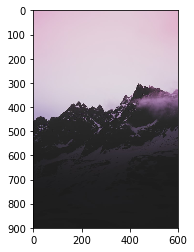

In [142]:
plt.imshow(face)

In [153]:
c_scores[0][3]

array([33750.,     0.,     0.,     0., 33542.])

In [6]:
imgs = []
for i in range(30) :
    imgs.append(imread("./Bulksplash/images/sky/test_" + str(i + 1) + ".jpg"))
    

In [7]:
display(imgs)

[Array([[[220, 126,  72],
         [225, 131,  77],
         [231, 138,  81],
         ...,
         [243, 190, 150],
         [241, 188, 148],
         [241, 188, 148]],
 
        [[218, 127,  70],
         [222, 131,  74],
         [226, 135,  78],
         ...,
         [239, 185, 141],
         [237, 183, 139],
         [236, 182, 138]],
 
        [[215, 126,  68],
         [217, 128,  70],
         [221, 132,  74],
         ...,
         [238, 180, 130],
         [236, 178, 128],
         [235, 177, 127]],
 
        ...,
 
        [[ 18,  11,   5],
         [ 18,  11,   5],
         [ 19,  11,   8],
         ...,
         [ 22,  14,  11],
         [ 22,  14,  11],
         [ 22,  14,  11]],
 
        [[ 18,  11,   5],
         [ 18,  11,   5],
         [ 18,  10,   7],
         ...,
         [ 21,  13,  10],
         [ 21,  13,  10],
         [ 21,  13,  10]],
 
        [[ 17,  10,   4],
         [ 17,  10,   4],
         [ 18,  10,   7],
         ...,
         [ 20,  12,   9],
  

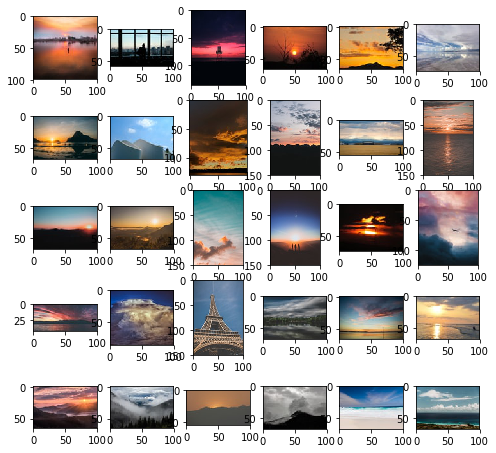

In [8]:
w=15
h=15
fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = imgs[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [11]:
sunset_imgs = []
for i in range(20) :
    sunset_imgs.append(Image.open("./Bulksplash/images/sunset/sunset_" + str(i + 1) + ".jpg"))


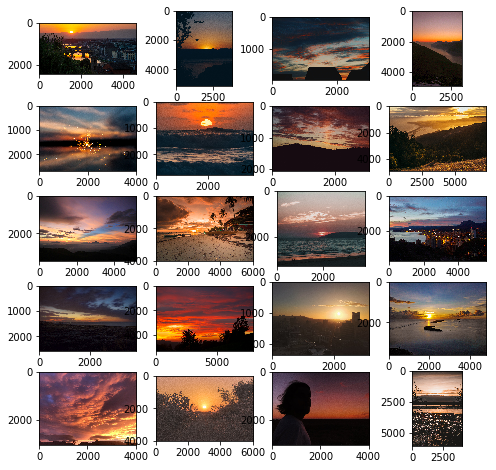

In [13]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = sunset_imgs[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [29]:
resized_sunset_imgs = []
for img in sunset_imgs :
    resized_sunset_imgs.append(np.asarray(img.thumbnail((100, 100), Image.ANTIALIAS)))

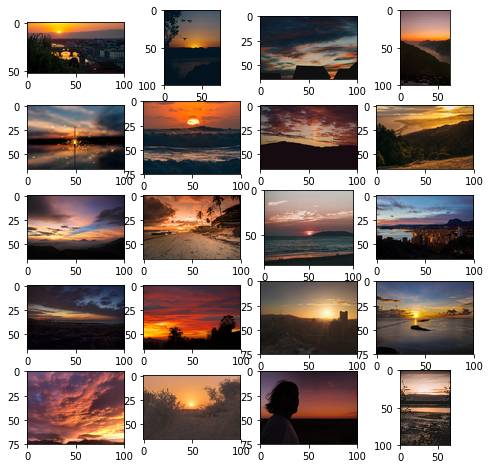

In [16]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = sunset_imgs[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [231]:
test_scores = []

for i in range(30) :
    test_scores.append(computeAllColorScores(imgs[i], 4))

In [259]:
copy = np.copy(test_scores)

In [260]:
for x in range(len(imgs)) :
    copy[x] /= (imgs[x].shape[0] * imgs[x].shape[1])
    #for i in range(copy.shape[1]) :
     #   for j in range(copy.shape[2]) :
      #      copy[x][i][j] /= (imgs[x].shape[0] * imgs[x].shape[1])#np.sum(copy[x][i][j])

In [41]:
WHITE_BLACK = np.zeros((4, 4, 5))
WHITE_BLACK[0][0][4] = 1
for i in range(0, 2) :
    for j in range(0, 4) :
        WHITE_BLACK[i][j][0] = 1
        
for i in range(2, 4) :
    for j in range (0, 4) :
        WHITE_BLACK[i][j][3] = 1
#display(WHITE_BLACK)

RED_BLACK = np.zeros((4, 4, 5))

for i in range(0, 2) :
    for j in range(0, 4) :
        RED_BLACK[i][j][0] = 1
        
for i in range(2, 4) :
    for j in range (0, 4) :
        RED_BLACK[i][j][3] = 1
#display(RED_BLACK)
# RED TOP, BLACK BOTTOM

BLUE_BLACK = np.zeros((4, 4, 5))

for i in range(0, 2) :
    for j in range(0, 4) :
        BLUE_BLACK[i][j][2] = 1
        
for i in range(2, 4) :
    for j in range (0, 4) :
        BLUE_BLACK[i][j][3] = 1
#display(BLUE_BLACK)
# BLUE TOP, BLACK BOTTOM


In [262]:
bestSoFar = copy[0]
bestScoreSoFar = -1
stuff = np.empty(len(imgs))
k = 0
for bob in copy :
    totalScore = 0
    for i in range(4) :
        for j in range(4) :
            #display(totalScore)
            totalScore += bob[i][j][np.argmax(RED_BLACK[i][j])]
            
    if (totalScore > bestScoreSoFar) :
        bestSoFar = bob
        bestScoreSoFar = totalScore
    stuff[k] = totalScore
    k += 1
    #display(totalScore)
            

In [263]:
display(stuff)

array([0.5349    , 0.39016949, 0.46240876, 0.78166667, 0.50090909,
       0.00613333, 0.43492537, 0.00238806, 0.3170229 , 0.5398    ,
       0.29836364, 0.47166667, 0.55402985, 0.56238806, 0.        ,
       0.1962    , 0.43813333, 0.54504   , 0.3044186 , 0.17701149,
       0.0358    , 0.16731343, 0.11242424, 0.34149254, 0.74060606,
       0.20969697, 0.49910714, 0.66343284, 0.00149254, 0.10044776])

In [264]:
display(np.argmax(stuff))
display(stuff)

3

array([0.5349    , 0.39016949, 0.46240876, 0.78166667, 0.50090909,
       0.00613333, 0.43492537, 0.00238806, 0.3170229 , 0.5398    ,
       0.29836364, 0.47166667, 0.55402985, 0.56238806, 0.        ,
       0.1962    , 0.43813333, 0.54504   , 0.3044186 , 0.17701149,
       0.0358    , 0.16731343, 0.11242424, 0.34149254, 0.74060606,
       0.20969697, 0.49910714, 0.66343284, 0.00149254, 0.10044776])

In [245]:
asdf = 0
thing = imgs[20]
asdf2 = 0
for i in range(thing.shape[0]) :
    for j in range(thing.shape[1]) :
        if (isBlue(thing[i][j])) :
            asdf += 1
        if (isBlack(thing[i][j])) :
            asdf2 += 1
            

In [246]:
display(asdf)
display(asdf2)

8935

25

In [247]:
display(asdf)
display(asdf2)

8935

25

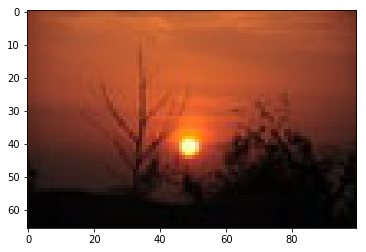

In [265]:
plt.imshow(imgs[np.argmax(stuff)])

In [48]:
def findBestMatches(normalized_color_scores, input_profile) :
    bestScoreSoFar = -1
    stuff = np.empty(normalized_color_scores.shape[0])
    k = 0
    for img in normalized_color_scores :
        totalScore = 0
        for i in range(4) :
            for j in range(4) :
                totalScore += img[i][j][np.argmax(input_profile[i][j])]
            
        if (totalScore > bestScoreSoFar) :
            bestSoFar = img
            bestScoreSoFar = totalScore
        stuff[k] = totalScore
        k += 1
        
    #display(stuff)
    #display (np.argmax(stuff))
    #display(np.argsort(stuff))
    return np.argsort(stuff)


In [54]:
def sortImagesByMatch(imgs, input_profile) :
    all_color_scores = [computeAllColorScores(img, 4) for img in imgs]
    normalized_color_scores = np.copy(all_color_scores)
    for i in range(len(imgs)) : 
        normalized_color_scores[i] /= (imgs[i].shape[0] * imgs[i].shape[1])
    """for x in range(len(imgs)) :
        for i in range(normalized_color_scores.shape[1]) :
            for j in range(normalized_color_scores.shape[2]) :
                normalized_color_scores[x][i][j] /= (imgs[x].shape[0] * imgs[x].shape[1])
                """
    display(normalized_color_scores)
    return [imgs[i] for i in reversed(findBestMatches(normalized_color_scores, input_profile))]

# Assumes color score matrix is normalized
def sortImagesByMatchAndMatrix(imgs, input_profile, color_score_matrix) :
    return [imgs[i] for i in reversed(findBestMatches(color_score_matrix, input_profile))]


In [318]:
test_result = sortImagesByMatch(imgs, BLUE_BLACK)
#display(imgs)

array([0.1091    , 0.4540678 , 0.35912409, 0.28166667, 0.06636364,
       0.04813333, 0.21492537, 0.47328358, 0.08618321, 0.3946    ,
       0.10036364, 0.        , 0.64671642, 0.07343284, 0.40993333,
       0.38006667, 0.3504    , 0.14768   , 0.0027907 , 0.1883908 ,
       0.43526667, 0.19253731, 0.09772727, 0.00238806, 0.24318182,
       0.22106061, 0.        , 0.25537313, 0.39567164, 0.2838806 ])

12

array([26, 11, 23, 18,  5,  4, 13,  8, 22, 10,  0, 17, 19, 21,  6, 25, 24,
       27,  3, 29, 16,  2, 15,  9, 28, 14, 20,  1,  7, 12])

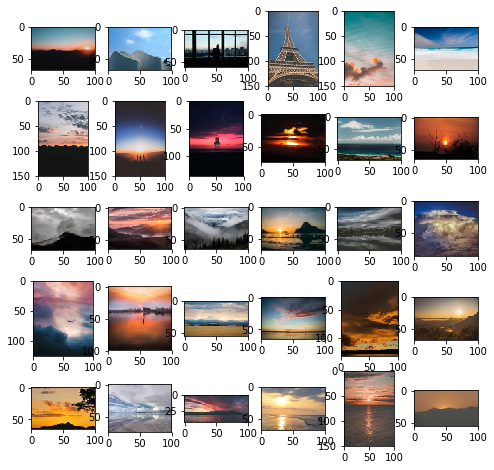

In [319]:
w=15
h=15
fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = test_result[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


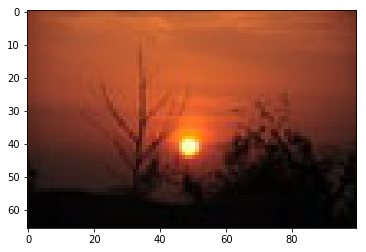

In [291]:
plt.imshow(test_result[0])

In [296]:
blue_black_result = sortImagesByMatch(imgs, BLUE_BLACK)

array([0.1091    , 0.4540678 , 0.35912409, 0.28166667, 0.06636364,
       0.04813333, 0.21492537, 0.47328358, 0.08618321, 0.3946    ,
       0.10036364, 0.        , 0.64671642, 0.07343284, 0.40993333,
       0.38006667, 0.3504    , 0.14768   , 0.0027907 , 0.1883908 ,
       0.43526667, 0.19253731, 0.09772727, 0.00238806, 0.24318182,
       0.22106061, 0.        , 0.25537313, 0.39567164, 0.2838806 ])

12

array([26, 11, 23, 18,  5,  4, 13,  8, 22, 10,  0, 17, 19, 21,  6, 25, 24,
       27,  3, 29, 16,  2, 15,  9, 28, 14, 20,  1,  7, 12])

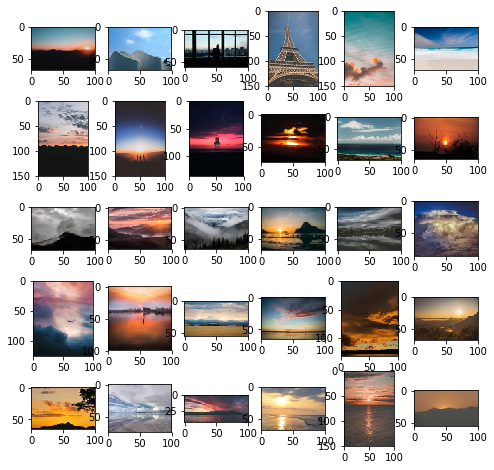

In [297]:
w=15
h=15
fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = blue_black_result[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [316]:
BLUE_REFERENCE = np.zeros((4, 4, 3))
for i in range(BLUE_REFERENCE.shape[0]) :
    for j in range(BLUE_REFERENCE.shape[1]) :
        if (i < (BLUE_REFERENCE.shape[0]) / 2.0) :
            BLUE_REFERENCE[i][j] = [0, 0, 1]

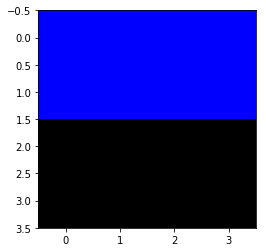

In [317]:
plt.imshow(BLUE_REFERENCE)

In [17]:
import pickle


[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x52 at 0x1278B1B00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=75x100 at 0x127296940>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x65 at 0x127292278>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=66x100 at 0x12729A470>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x127286780>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x75 at 0x1278B1630>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x12729FF60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x12729FA58>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x127C05B38>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x12729B828>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x84 at 0x1271B79B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x66 at 0x12729EB38>,
 <PIL.JpegImagePlugin.JpegImageFile imag

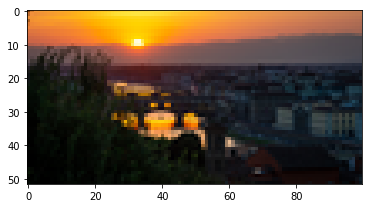

In [21]:
display(sunset_imgs)
plt.imshow(sunset_imgs[0])


IndexError: tuple index out of range

In [33]:
matrix_sunset_imgs = []
for img in sunset_imgs :
    matrix_sunset_imgs.append(np.asarray(img))

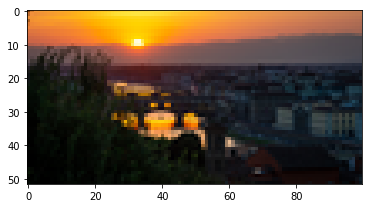

In [35]:
plt.imshow(matrix_sunset_imgs[0])

In [36]:
test_matrix = computeAllColorScores(matrix_sunset_imgs[0], 4)

In [37]:
display(test_matrix)

array([[[293.,   0.,   0.,   0.,   0.],
        [319.,   0.,   0.,   0.,   1.],
        [242.,   0.,   0.,   0.,   0.],
        [183.,   0.,   0.,   0.,   0.]],

       [[  5.,   0.,   0., 136.,   0.],
        [115.,   0.,   0.,   2.,   0.],
        [  0.,   0.,   0.,  34.,   0.],
        [  0.,   0.,   0.,  47.,   0.]],

       [[  0.,   0.,   0., 280.,   0.],
        [129.,   0.,   0.,  72.,   0.],
        [ 13.,   0.,   0.,  73.,   0.],
        [  0.,   0.,   5.,  27.,   0.]],

       [[  0.,   0.,   0., 324.,   0.],
        [  0.,   0.,   0., 301.,   0.],
        [  6.,   0.,   0., 225.,   0.],
        [  0.,   0.,   0., 257.,   0.]]])

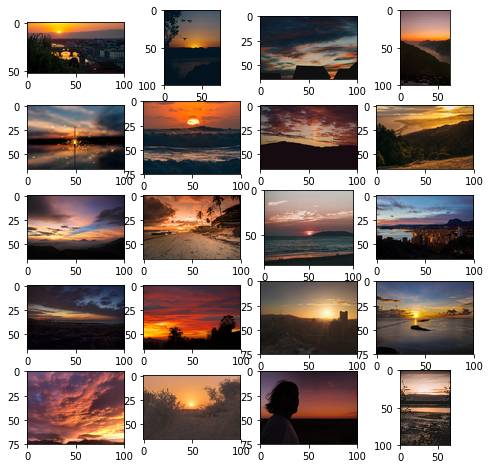

In [39]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = sunset_imgs[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [55]:
sunset_result = sortImagesByMatch(matrix_sunset_imgs, RED_BLACK)

array([[[[0.05634615, 0.        , 0.        , 0.        , 0.        ],
         [0.06134615, 0.        , 0.        , 0.        , 0.00019231],
         [0.04653846, 0.        , 0.        , 0.        , 0.        ],
         [0.03519231, 0.        , 0.        , 0.        , 0.        ]],

        [[0.00096154, 0.        , 0.        , 0.02615385, 0.        ],
         [0.02211538, 0.        , 0.        , 0.00038462, 0.        ],
         [0.        , 0.        , 0.        , 0.00653846, 0.        ],
         [0.        , 0.        , 0.        , 0.00903846, 0.        ]],

        [[0.        , 0.        , 0.        , 0.05384615, 0.        ],
         [0.02480769, 0.        , 0.        , 0.01384615, 0.        ],
         [0.0025    , 0.        , 0.        , 0.01403846, 0.        ],
         [0.        , 0.        , 0.00096154, 0.00519231, 0.        ]],

        [[0.        , 0.        , 0.        , 0.06230769, 0.        ],
         [0.        , 0.        , 0.        , 0.05788462, 0.        ],


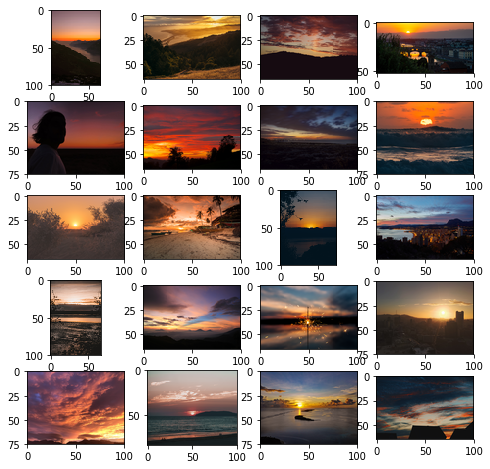

In [56]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = sunset_result[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [59]:
test_matrix = np.array([computeAllColorScores(img, 4) / (img.shape[0] * img.shape[1]) for img in matrix_sunset_imgs])

In [75]:
matrix_test_result = sortImagesByMatchAndMatrix(matrix_sunset_imgs, RED_BLACK, test_matrix)

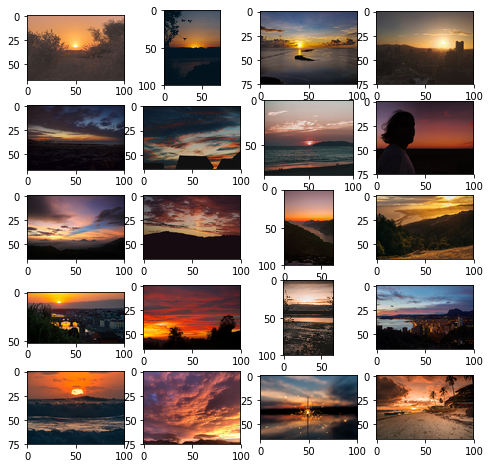

In [76]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = matrix_test_result[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [62]:
display(test_matrix)

array([[[[0.05634615, 0.        , 0.        , 0.        , 0.        ],
         [0.06134615, 0.        , 0.        , 0.        , 0.00019231],
         [0.04653846, 0.        , 0.        , 0.        , 0.        ],
         [0.03519231, 0.        , 0.        , 0.        , 0.        ]],

        [[0.00096154, 0.        , 0.        , 0.02615385, 0.        ],
         [0.02211538, 0.        , 0.        , 0.00038462, 0.        ],
         [0.        , 0.        , 0.        , 0.00653846, 0.        ],
         [0.        , 0.        , 0.        , 0.00903846, 0.        ]],

        [[0.        , 0.        , 0.        , 0.05384615, 0.        ],
         [0.02480769, 0.        , 0.        , 0.01384615, 0.        ],
         [0.0025    , 0.        , 0.        , 0.01403846, 0.        ],
         [0.        , 0.        , 0.00096154, 0.00519231, 0.        ]],

        [[0.        , 0.        , 0.        , 0.06230769, 0.        ],
         [0.        , 0.        , 0.        , 0.05788462, 0.        ],


In [65]:
display(test_matrix[0][0][0])

array([0.05634615, 0.        , 0.        , 0.        , 0.        ])

In [72]:
for i in range(test_matrix.shape[0]) :
    for j in range(test_matrix.shape[1]) :
        for k in range(test_matrix.shape[2]) :
            norm = np.linalg.norm(test_matrix[i][j][k])
            test_matrix[i][j][k] /= norm if norm != 0 else 1

In [73]:
display(test_matrix.shape)

(20, 4, 4, 5)

In [74]:
display(test_matrix)

array([[[[1.        , 0.        , 0.        , 0.        , 0.        ],
         [0.99999509, 0.        , 0.        , 0.        , 0.00313478],
         [1.        , 0.        , 0.        , 0.        , 0.        ],
         [1.        , 0.        , 0.        , 0.        , 0.        ]],

        [[0.03673988, 0.        , 0.        , 0.99932486, 0.        ],
         [0.99984881, 0.        , 0.        , 0.01738867, 0.        ],
         [0.        , 0.        , 0.        , 1.        , 0.        ],
         [0.        , 0.        , 0.        , 1.        , 0.        ]],

        [[0.        , 0.        , 0.        , 1.        , 0.        ],
         [0.8731977 , 0.        , 0.        , 0.48736616, 0.        ],
         [0.17532384, 0.        , 0.        , 0.98451082, 0.        ],
         [0.        , 0.        , 0.18208926, 0.983282  , 0.        ]],

        [[0.        , 0.        , 0.        , 1.        , 0.        ],
         [0.        , 0.        , 0.        , 1.        , 0.        ],
